In [31]:
import numpy as np
import matplotlib.pyplot as plt


 Recall the 3D-Var cost function
$$J (x) = \frac{1}{2}(x − x^b)^T B^{−1}(x − x^b) + \frac{1}{2}(Hx − y)^T R^{−1}(Hx − y)$$
with optimal state estimate $\hat{x} = x^b + K(y − Hx^b)$, $K = BH^T (HBH^T + R)^{−1}$.


(a) Assume we have a $n$ states to estimate, i.e. $x \in R^n$, and single observation at a point
corresponding to the jth element of the state vector with variance $\sigma^2_r$ Simplify the
equation for $\hat{x}$ 

(b) Develop a Python code for 3D-Var to estimate temperatures at 5 locations. Assume a
background from climatological data $x^b = (13, 12, 15, 19, 17)^T $ with error covariance

$${B}=\begin{bmatrix}
\sigma^2_{b_1} & cv_b&0 & 0& 0 \\
cv_b&\sigma^2_{b_2} & cv_b&0 & 0 \\
0 & \ddots&\ddots&\ddots &  0\\
\ddots  & \ddots  & \ddots & \ddots& 0 \\
0 & 0& \ddots & \ddots & cv_b\\
0&0&0&cv_b&\sigma^2_{b_5}
\end{bmatrix}$$
Also assume we observe the temperature at all 5 locations with $y = (13.2, 14.9, 16.9, 18.0, 19.8)^T$
and corresponding error variance 0.2 for all locations.

i.) Assume $\sigma^2_{b_1}$ = 0.5 for all i and $cv_b$ = 0.125. Plot 3D-Var optimal estimates, together
with the data and background as points. Use a legend for your plot and describe
how the estimates compare with the background and data.

ii.) Vary values for σbi and cvb and describe how this effects your optimal estimates.

In [32]:
def V3D(xb, Y, H, B, R):
    k= (B@np.transpose(H))@(np.linalg.inv(R+H@B@np.transpose(H)))
    x= xb+ k@(Y- H@xb)
    return x

In [33]:
# creating B matrix
l, sgm_b, cv_b=5, 0.5, 0.125,
B= sgm_b*np.eye(l,k=0)+cv_b*(np.eye(l,k=-1)+np.eye(l,k=1))
B

array([[0.5  , 0.125, 0.   , 0.   , 0.   ],
       [0.125, 0.5  , 0.125, 0.   , 0.   ],
       [0.   , 0.125, 0.5  , 0.125, 0.   ],
       [0.   , 0.   , 0.125, 0.5  , 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.5  ]])

In [34]:
xb=np.transpose(np.array([[13,12,15,19,17]]))
# xb.shape
Y=np.transpose(np.array([[13.2,14.9,16.9,18.0,19.8]]))
er_v=0.2
R=er_v*np.eye(l,k=0)
H=np.identity(l)
est_Val= V3D(xb, Y, H, B, R)
est_Val

array([[13.27720122],
       [14.14767315],
       [16.39582914],
       [18.53568369],
       [18.9043422 ]])

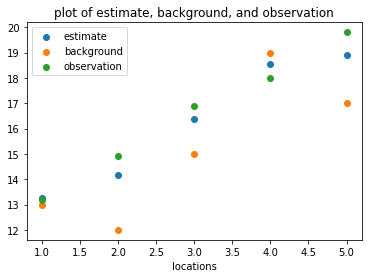

In [35]:
plt.scatter([i for i in range(1,l+1)],est_Val,label="estimate")
plt.scatter([i for i in range(1,l+1)],xb,label="background")
plt.scatter([i for i in range(1,l+1)],Y,label="observation")
plt.title("plot of estimate, background, and observation")
plt.xlabel("locations")
plt.legend()


1. i) $\color{red} {Good}$

    it can be seen the estimates and observations in are higer  than background for location except at locatuion 4



1 ii)
    using $\sigma_b=0.3125 $ and $cv_b=0.1875$


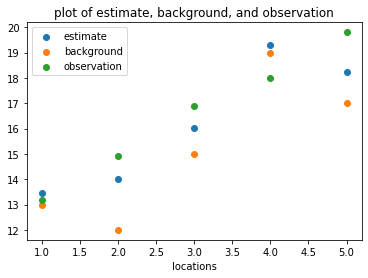

In [36]:
sgm_b, cv_b= 0.3125 , 0.1875,
B= sgm_b*np.eye(l,k=0)+cv_b*(np.eye(l,k=-1)+np.eye(l,k=1))
est_Val= V3D(xb, Y, H, B, R)
plt.scatter([i for i in range(1,l+1)],est_Val,label="estimate")
plt.scatter([i for i in range(1,l+1)],xb,label="background")
plt.scatter([i for i in range(1,l+1)],Y,label="observation")
plt.title("plot of estimate, background, and observation")
plt.xlabel("locations")
plt.legend();


using $\sigma_b=0.9$ and $cv_b=0.5$
    


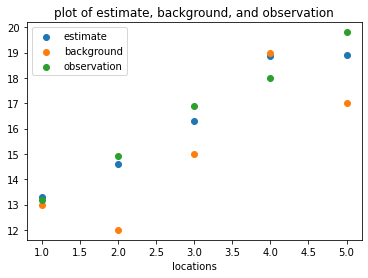

In [37]:
sgm_b, cv_b= 0.9 , 0.5,
B= sgm_b*np.eye(l,k=0)+cv_b*(np.eye(l,k=-1)+np.eye(l,k=1))
est_Val= V3D(xb, Y, H, B, R)
plt.scatter([i for i in range(1,l+1)],est_Val,label="estimate")
plt.scatter([i for i in range(1,l+1)],xb,label="background")
plt.scatter([i for i in range(1,l+1)],Y,label="observation")
plt.title("plot of estimate, background, and observation")
plt.xlabel("locations")
plt.legend()


# qtn 3  $\color{red} {Good}$

Consider a physical process with scalar state variables $x_i$ generated according to $x_i = 1.2x_{i−1}(1−x_{i−1}),\quad i = 1, \cdots , 40 $and data $y_i = x_i + \epsilon_i$ where $\epsilon_i$ are independent random variables that
follow a Normal distribution with mean 0 and standard deviation $\sigma$. Develop Python code
to answer the following questions.

(a) Start with $x_0 = 0.2$, generate and plot the state variables $x_i$ for $i = 1,\cdots, 40$.

(b) Form data $y_i = x_i + \epsilon_1,\quad i = 1,\cdots, 40$ with $ \sigma= 0.002$. Plot the data as points on the
same graph as the state variables.

(c) Write a Python function to construction the cost function $J = ||\epsilon||^2_2$
 as a function of $x_0$.
(In this function you will find $x_1,\cdots, x_{40}$ with the process model.) Evaluate $J$ at 200
values of $x_0$ with $0 \leq x_0 \leq 0.7$ and plot $J$ as a function of $x_0$.

(d) Use your plot in 3c to estimate the values of $x_0$ where the minimum of $J$ occurs. Then
use this estimate of $x_0$ in the process model to update $x_1,\cdots, x_{40}$ . Plot these values
of the state that are updated with the data on the same graph as the original state
estimates in 3a.


In [38]:
def PpSV(x0):
    '''PpSV; Physical process with scalar state variables '''
    alp=1.2
    n=40
    x=np.zeros(n)
    x[0]=x0
    for i in range(1,n):
        x[i]=alp*x[i-1]*(1-x[i-1])

    return x

x0=0.2
x_i=PpSV(x0)
x_i


array([0.2       , 0.192     , 0.1861632 , 0.18180776, 0.17850443,
       0.17596872, 0.17400448, 0.1724723 , 0.17127073, 0.17032448,
       0.16957686, 0.16898466, 0.16851461, 0.16814093, 0.16784347,
       0.16760644, 0.16741743, 0.1672666 , 0.16714618, 0.16705   ,
       0.16697316, 0.16691175, 0.16686266, 0.16682341, 0.16679204,
       0.16676694, 0.16674688, 0.16673083, 0.16671799, 0.16670772,
       0.16669951, 0.16669294, 0.16668768, 0.16668348, 0.16668012,
       0.16667743, 0.16667527, 0.16667355, 0.16667218, 0.16667107])

In [39]:
mu, sigma = 0, 0.002
eps_i= np.random.normal(mu, sigma,np.size(x_i))
# eps_i.size
y_i= x_i+ eps_i
y_i

array([0.2043567 , 0.19145796, 0.18798044, 0.17981101, 0.17966041,
       0.17890563, 0.17511624, 0.17352599, 0.16958931, 0.16951552,
       0.17045549, 0.17162033, 0.16467439, 0.1675874 , 0.16718839,
       0.16982085, 0.1679982 , 0.16671527, 0.16339253, 0.16683194,
       0.16509167, 0.16254345, 0.16819288, 0.16878748, 0.16570818,
       0.16613324, 0.16306478, 0.16764425, 0.16322163, 0.1690777 ,
       0.16732159, 0.1710512 , 0.16438987, 0.16952676, 0.16459863,
       0.1653784 , 0.16655023, 0.16666949, 0.16666357, 0.16834139])

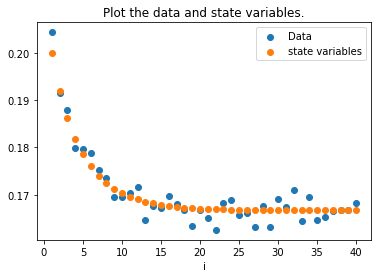

In [40]:
n=np.size(x_i)
plt.scatter([i for i in range(1,n+1) ],y_i,label="Data")
plt.scatter([i for i in range(1,n+1) ],x_i,label="state variables")
plt.title("Plot the data and state variables.")
plt.xlabel("i")
plt.legend();

In [41]:
def CostFn(x0):
    x=PpSV(x0)
    E= sum((y_i-x)**2)
    return E


# J=CostFn(0.2)
# J

In [42]:
X=np.linspace(0,0.7,200)
j=[]
for x0 in X:
    j.append(CostFn(x0))
j
J=np.array(j)  
J#.size

array([1.16422564e+00, 4.90783898e-01, 3.86636598e-01, 3.26269625e-01,
       2.83894574e-01, 2.51418876e-01, 2.25230618e-01, 2.03398738e-01,
       1.84767874e-01, 1.68591061e-01, 1.54357102e-01, 1.41700557e-01,
       1.30350998e-01, 1.20102613e-01, 1.10795078e-01, 1.02301033e-01,
       9.45175929e-02, 8.73604343e-02, 8.07595678e-02, 7.46562506e-02,
       6.90006905e-02, 6.37503079e-02, 5.88684011e-02, 5.43231073e-02,
       5.00865844e-02, 4.61343585e-02, 4.24447991e-02, 3.89986935e-02,
       3.57788973e-02, 3.27700464e-02, 2.99583181e-02, 2.73312300e-02,
       2.48774718e-02, 2.25867620e-02, 2.04497266e-02, 1.84577945e-02,
       1.66031082e-02, 1.48784462e-02, 1.32771562e-02, 1.17930961e-02,
       1.04205835e-02, 9.15435029e-03, 7.98950346e-03, 6.92149015e-03,
       5.94606677e-03, 5.05927154e-03, 4.25740002e-03, 3.53698329e-03,
       2.89476833e-03, 2.32770053e-03, 1.83290785e-03, 1.40768654e-03,
       1.04948831e-03, 7.55908655e-04, 5.24676247e-04, 3.53643349e-04,
      

$\color{red} {Good}$

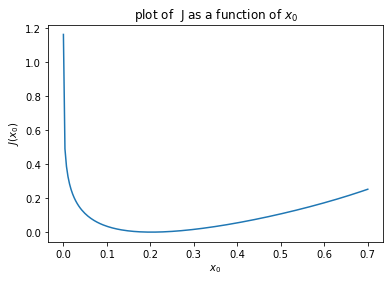

In [43]:
plt.plot(X,J)
plt.title("plot of  J as a function of" " " r'$x_0$' )
plt.xlabel( r'$x_0 $ ')
plt.ylabel( r'$J(x_0) $ ')
plt.show()

the minimum  of $ J(x_0) $ occurs for  $ 0.15 <x_0< 0.25 $ 

$\color{red} {Good}$

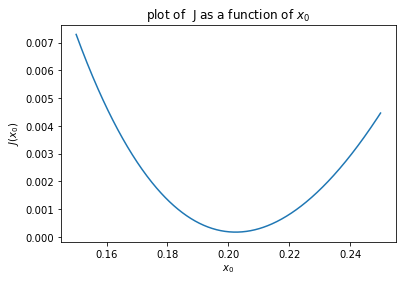

In [44]:
X_new= np.linspace(0.15,.25,500)##Zoomig in the interval
j=[]
for x0 in X_new:
    j.append(CostFn(x0))
j
Jn=np.array(j) 
plt.plot(X_new,Jn)
plt.title("plot of  J as a function of" " " r'$x_0$' )
plt.xlabel( r'$x_0 $ ')
plt.ylabel( r'$J(x_0) $ ')
plt.show()

from the graph we se that $x_0 = 0.19$

$\color{red} {Good}$

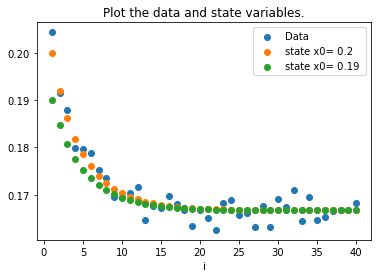

In [45]:
x0=0.19
x_i1=PpSV(x0)
n=np.size(x_i)

plt.scatter([i for i in range(1,n+1) ],y_i,label="Data")
plt.scatter([i for i in range(1,n+1) ],x_i,label="state x0= 0.2")
plt.scatter([i for i in range(1,n+1) ],x_i1,label="state x0= 0.19 ")
plt.title("Plot the data and state variables.")
plt.xlabel("i")
plt.legend();